#**PHÂN TÍCH KHÁM PHÁ VỀ CHIẾN DỊCH MARKETING (MARKETING CAMPAIGN)**

**Thông tin tập dữ liệu : marketing_campaign.csv**

  Bộ dữ liệu Marketing Campaign được thu thập từ một công ty bán lẻ trong giai đoạn 2012–2014, với quy mô 2.240 khách hàng.
  
  Dữ liệu bao gồm nhiều nhóm thông tin quan trọng:
  * Đặc điểm nhân khẩu học (năm sinh, trình độ học vấn, tình trạng hôn nhân, thu nhập, số trẻ em trong gia đình)
  * Hành vi mua sắm (số lần mua qua website, catalog, cửa hàng, mua hàng khuyến mãi, tần suất truy cập website)
  * Chi tiêu chi tiết theo từng loại sản phẩm (rượu vang, thịt, trái cây, cá, bánh kẹo, vàng)
  * Mức độ phản hồi đối với các chiến dịch marketing trực tiếp (AcceptedCmp1–5, Response).
  * Ngoài ra, dữ liệu cũng ghi nhận ngày khách hàng gia nhập, số ngày kể từ lần mua gần nhất, cùng một số biến kỹ thuật không mang ý nghĩa phân tích (Z_CostContact, Z_Revenue).

  Bộ dữ liệu này thường được sử dụng trong các bài toán phân tích dữ liệu khám phá (EDA). Nhờ sự đa dạng về biến số và bối cảnh thực tế, Marketing Campaign là một trong những tập dữ liệu kinh điển giúp nghiên cứu và thực hành các kỹ thuật phân tích khách hàng trong lĩnh vực Marketing Analytics và Machine Learning.

**Chuẩn bị môi trường**

In [2]:
!pip install sweetviz
!pip install numpy==1.26.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sweetviz as sv
print(np.__version__)

1.26.4


## **Mô tả tập dữ liệu**

In [2]:
# Đọc dữ liệu
df = pd.read_csv("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/marketing_campaign.csv", sep="\t")


In [3]:
# Kích thước và thông tin tổng quan
print(np.shape(df))
print(df.info())

(2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 n

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Tiền xử lý dữ liệu

### Xử lý dữ liệu thiếu

In [6]:
# KIỂM TRA DỮ LIỆU THIẾU
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors="coerce")

print("Tổng số giá trị null trong toàn bộ tập dữ liệu:", df.isnull().sum().sum())
print(df.isnull().sum())
df.isnull().sum()
df[df.isnull().any(axis=1)]


Tổng số giá trị null trong toàn bộ tập dữ liệu: 1348
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer            1324
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
dtype: int64


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,4,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,5,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,NaT,34,235,...,6,0,0,0,0,0,0,3,11,0
9,5899,1950,PhD,Together,5648.0,1,1,NaT,68,28,...,20,1,0,0,0,0,0,3,11,0
10,1994,1983,Graduation,Married,NaN,1,0,NaT,11,5,...,7,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,NaT,50,5,...,4,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,NaT,46,709,...,5,0,0,0,0,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,NaT,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,NaT,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
# ĐÁNH GIÁ TỈ LỆ THIẾU
missing_ratio = df.isna().mean() * 100
print("Tỷ lệ thiếu dữ liệu (%):")
print(missing_ratio.sort_values(ascending=False))


Tỷ lệ thiếu dữ liệu (%):
Dt_Customer            59.107143
Income                  1.071429
ID                      0.000000
NumWebPurchases         0.000000
Z_Revenue               0.000000
Z_CostContact           0.000000
Complain                0.000000
AcceptedCmp2            0.000000
AcceptedCmp1            0.000000
AcceptedCmp5            0.000000
AcceptedCmp4            0.000000
AcceptedCmp3            0.000000
NumWebVisitsMonth       0.000000
NumStorePurchases       0.000000
NumCatalogPurchases     0.000000
MntGoldProds            0.000000
NumDealsPurchases       0.000000
Year_Birth              0.000000
MntSweetProducts        0.000000
MntFishProducts         0.000000
MntMeatProducts         0.000000
MntFruits               0.000000
MntWines                0.000000
Recency                 0.000000
Teenhome                0.000000
Kidhome                 0.000000
Marital_Status          0.000000
Education               0.000000
Response                0.000000
dtype: float64


**Income — tỷ lệ thiếu 1.07% (rất thấp)** : Giữ lại cột, xử lý giá trị thiếu, có thể thay thế bằng giá trị trung bình.

**Dt_Customer — tỷ lệ thiếu 59.1% (rất cao)** : Nên xem xét loại bỏ vì không thể suy ra thông tin chính xác để giải thích cho mô hình vì gây sai lệch. Việc điền giá trị thay thế (mean date hoặc random) cũng không có ý nghĩa thống kê.

In [8]:
# XỬ LÝ DỮ LIỆU THIẾU
mean_income = df["Income"].mean()

# Thay thế NaN bằng giá trị trung bình
df["Income"].fillna(mean_income, inplace=True)

# Xóa Dt_Customer
df.drop(columns=["Dt_Customer"], inplace=True)

print("Tổng số giá trị null trong toàn bộ tập dữ liệu:", df["Income"].isnull().sum())
df.head()

Tổng số giá trị null trong toàn bộ tập dữ liệu: 0


/tmp/ipython-input-2288134772.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income"].fillna(mean_income, inplace=True)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,3,11,0


### Loại bỏ các đặc trưng dư thừa

In [9]:
# KIỂM TRA THUỘC TÍNH ĐỊNH DANH
for col in df:
    unique_ratio = df[col].nunique() / len(df) * 100
    print(f"{col}: {unique_ratio:.2f}% ")
    if unique_ratio == 100:
        print(f"Cột '{col}' là mã định danh (100% giá trị duy nhất)\n")

ID: 100.00% 
Cột 'ID' là mã định danh (100% giá trị duy nhất)

Year_Birth: 2.63% 
Education: 0.22% 
Marital_Status: 0.36% 
Income: 88.17% 
Kidhome: 0.13% 
Teenhome: 0.13% 
Recency: 4.46% 
MntWines: 34.64% 
MntFruits: 7.05% 
MntMeatProducts: 24.91% 
MntFishProducts: 8.12% 
MntSweetProducts: 7.90% 
MntGoldProds: 9.51% 
NumDealsPurchases: 0.67% 
NumWebPurchases: 0.67% 
NumCatalogPurchases: 0.62% 
NumStorePurchases: 0.62% 
NumWebVisitsMonth: 0.71% 
AcceptedCmp3: 0.09% 
AcceptedCmp4: 0.09% 
AcceptedCmp5: 0.09% 
AcceptedCmp1: 0.09% 
AcceptedCmp2: 0.09% 
Complain: 0.09% 
Z_CostContact: 0.04% 
Z_Revenue: 0.04% 
Response: 0.09% 


-   **Mã định danh (ID)** không mang giá trị thống kê và thông tin thực tế giúp hỗ trợ phân tích hành vi hay đặc điểm của khách hàng.

*Vì vậy, việc giữ lại cột định danh có thể gây nhiễu dữ liệu, khiến mô hình học sai lệch do nhận diện từng cá thể thay vì học được quy luật chung.*

In [10]:
# LOẠI BỎ THUỘC TÍNH ĐỊNH DANH
df.drop(columns=["ID"], inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


In [11]:
# KIỂM TRA CÁC CỘT CHỈ CÓ 1 GIÁ TRỊ DUY NHẤT
print(df.nunique())
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]

print("Các cột chỉ có 1 giá trị duy nhất:")
print(single_value_cols)


Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64
Các cột chỉ có 1 giá trị duy nhất:
['Z_CostContact', 'Z_Revenue']


Các cột **chỉ có một giá trị duy nhất** nên được xóa bỏ trong quá trình tiền xử lý dữ liệu vì chúng không mang thông tin phân biệt, không có độ biến thiên, không có ý nghĩa cho việc phân tích và dự đoán bất kỳ mối quan hệ hoặc xu hướng nào.
Do đó, việc loại bỏ các cột này giúp dữ liệu gọn, sạch và hiệu quả hơn trong cả phân tích mô tả lẫn mô hình dự đoán.

In [12]:
# LOẠI BỎ CỘT DƯ THỪA
df.drop(columns=single_value_cols, inplace=True)
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


### Xử lý dữ liệu trùng lặp

In [13]:
# KIỂM TRA DÒNG TRÙNG LẶP
duplicate_count = df.duplicated().sum()
print(f"Số dòng bị trùng lặp: {duplicate_count}")
print(np.shape(df))

Số dòng bị trùng lặp: 182
(2240, 25)


In [14]:
# XỬ LÝ DÒNG TRÙNG LẶP
df.drop_duplicates(inplace=True)
print(np.shape(df))

(2058, 25)


### Biến đổi đặc trưng

-  **Year_Birth** thường được dùng để tính toán tuổi (**Age**) của khách hàng, tuổi phản ánh thông tin hiện tại và có ý nghĩa phân tích cao hơn so với năm sinh.

*Year_Birth không còn ý nghĩa thống kê hoặc dự đoán trực tiếp, do đó cũng nên loại bỏ để dữ liệu rõ ràng và dễ phân tích hơn*

In [15]:
# Tạo cột “Age” từ “Year_Birth”
df["Age"] = 2014 - df["Year_Birth"]
# Xóa cột Year_Birth
df.drop(columns=["Year_Birth"], inplace=True)
df.head()


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,57
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,60
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,49
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,30
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,33


In [16]:
## Tổng quan dữ liệu sau tiền xử lý dữ liệu
print(np.shape(df))
df.info()
df.head()

(2058, 25)
<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2058 non-null   object 
 1   Marital_Status       2058 non-null   object 
 2   Income               2058 non-null   float64
 3   Kidhome              2058 non-null   int64  
 4   Teenhome             2058 non-null   int64  
 5   Recency              2058 non-null   int64  
 6   MntWines             2058 non-null   int64  
 7   MntFruits            2058 non-null   int64  
 8   MntMeatProducts      2058 non-null   int64  
 9   MntFishProducts      2058 non-null   int64  
 10  MntSweetProducts     2058 non-null   int64  
 11  MntGoldProds         2058 non-null   int64  
 12  NumDealsPurchases    2058 non-null   int64  
 13  NumWebPurchases      2058 non-null   int64  
 14  NumCatalogPurchases  2058 non-null   int64  
 15  NumStorePurchases    2058 non-nu

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,57
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,60
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,49
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,30
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,33


## Trực quan dữ liệu (SweetViz)

**Sweetviz** là một thư viện Python hỗ trợ phân tích dữ liệu khám phá (EDA) một cách trực quan và tự động. Công cụ này tạo ra báo cáo HTML với các thống kê mô tả, biểu đồ phân phối, mối quan hệ giữa biến độc lập – biến mục tiêu và so sánh giữa nhiều tập dữ liệu (train/test hoặc nhóm con).

Với giao diện trực quan, Sweetviz giúp rút ngắn thời gian phân tích ban đầu, hỗ trợ nhà phân tích dữ liệu nhanh chóng nắm bắt đặc điểm nổi bật và các vấn đề tiềm ẩn trong tập dữ liệu.

In [18]:
# Chia nhóm các đặc trưng
group1 = ["Age","Education","Marital_Status","Income", "Kidhome","Teenhome"]
group2 = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
group3 = ["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]
group4 = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5", "Response"]
group5 = ["Complain", "Recency"]

groups = {
    "demographics": group1,        #Thông tin nhân khẩu học -> chân dung KH và phân loại
    "spending_products": group2,   #Hành vi tiêu dùng (chi tiêu theo loại sản phẩm)
    "purchase_channels": group3,   #Kênh và thói quen mua sắm
    "marketing_response": group4,  #Hiệu quả chiến dịch
    "customer_status": group5      #Trạng thái của khách hàng
}



In [ ]:
# # Xuất báo cáo HTML cho từng nhóm
# for name, cols in groups.items():
#     report = sv.analyze(df[cols])
#     report.show_html(f"/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetViz/report_{name}.html")
#     print(f"Đã tạo báo cáo: report_{name}.html")

In [19]:
# # --- Tạo và xuất báo cáo PDF cho từng nhóm ---
# for name, cols in groups.items():
#     report = sv.analyze(df[cols])
#     html_path = f"/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_{name}.pdf"
#     report.show_html(html_path)
#     print(f"Đã tạo báo cáo Sweetviz: {name}")

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_demographics.pdf was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
✅ Đã tạo báo cáo Sweetviz: /content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_demographics.pdf


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_spending_products.pdf was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
✅ Đã tạo báo cáo Sweetviz: /content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_spending_products.pdf


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_purchase_channels.pdf was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
✅ Đã tạo báo cáo Sweetviz: /content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_purchase_channels.pdf


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_marketing_response.pdf was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
✅ Đã tạo báo cáo Sweetviz: /content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_marketing_response.pdf


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_customer_status.pdf was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
✅ Đã tạo báo cáo Sweetviz: /content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Report_SweetVizPDF/report_customer_status.pdf


## **Phân tích đơn biến và đa biến**



---


**Xác định biến đặc trưng (Features) và biến mục tiêu (Target)**






**1. Features**

*   Demographic

    - **Age** - Tuổi của khách hàng và có ảnh hưởng lớn đến hành vi tiêu dùng.

    - **Education** - Trình độ học vấn, dự báo về năng lực tài chính, mức thu nhập và phong cách tiêu dùng.

    - **Marital_Status** - Tình trạng hôn nhân , ảnh hưởng đến chi tiêu.

    - **Income** - Thu nhập hàng năm, thường có tương quan trực tiếp với mức chi tiêu và phản hồi marketing.

    - **Kidhome** - Số trẻ em trong hộ gia đình, ảnh hưởng đến nhu cầu tiêu dùng.

    - **Teenhome** - Số thiếu niên trong hộ gia đình.

*   Spending_products

    - **MntWines** -  Số tiền chi cho rượu vang.

    - **MntFruits** - Số tiền chi cho trái cây.

    - **MntMeatProducts** - Số tiền chi cho thịt.

    - **MntFishProducts** - Số tiền chi cho cá.

    - **MntSweetProducts** - Số tiền chi cho bánh kẹo.

    - **MntGoldProds** - Số tiền chi cho sản phẩm vàng/xa xỉ.

*Đây là các biến hành vi mua hàng (behavioral variables), cho thấy mức độ ưu tiên sản phẩm và khả năng phân khúc khách hàng theo sở thích.*
  
*   Purchase_channels

    - **NumDealsPurchases** - Số lượng đơn hàng được mua qua khuyến mãi.

    - **NumWebPurchases** - Số lượng mua hàng qua website.

    - **NumCatalogPurchases** - Số lượng mua hàng qua catalog.

    - **NumStorePurchases** - Số lượng mua hàng trực tiếp tại cửa hàng.

    - **NumWebVisitsMonth** - Số lần khách hàng truy cập website trong tháng

*Các biến này phản ánh kênh ưa thích và xu hướng mua sắm đa kênh (Omni-channel behavior)*

*   Campaign Response
    
    - **AcceptedCmp1 → AcceptedCmp5** - Khách hàng có phản hồi (1) hay không (0) trong từng chiến dịch marketing trước đó

*   Customer_Status

    - **Recency** - Số ngày kể từ lần mua hàng cuối cùng

    - **Complain** – Biến phản ánh việc khách hàng có từng khiếu nại về sản phẩm hoặc dịch vụ của công ty (1: có, 0: không).


**2. Target**

-  **Response** - Phản hồi của khách hàng trong chiến dịch marketing gần nhất



---



/tmp/ipython-input-2352983022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


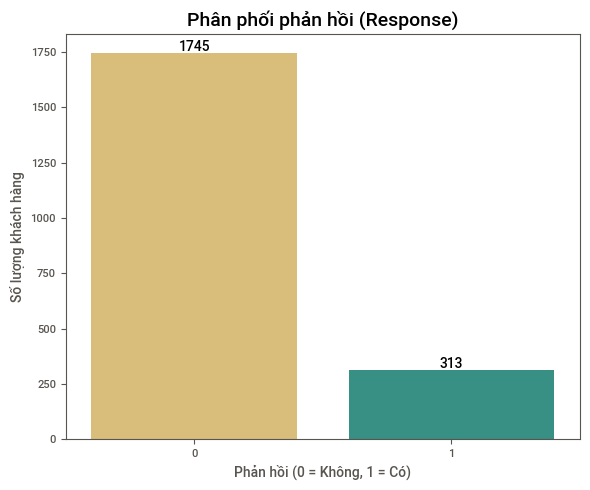

In [20]:
# PHÂN PHỐI PHẢN HỒI (RESPONSE - TARGET)
plt.figure(figsize=(6, 5))
sns.countplot(
    data=df,
    x="Response",
    palette=["#E9C46A", "#2A9D8F"]
)

plt.title("Phân phối phản hồi (Response)", fontsize=14, fontweight="bold")
plt.xlabel("Phản hồi (0 = Không, 1 = Có)")
plt.ylabel("Số lượng khách hàng")

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 10,
             f"{int(p.get_height())}", ha='center', fontsize=10)

plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/response.pdf", format="pdf", bbox_inches="tight")
plt.show()


-  *Hầu hết khách hàng đều không phản hồi, cần phân tích để xem xét điều chỉnh và đưa ra chiến lược mới hiểu quả hơn.*

### **Ma trận tương quan**

In [21]:
### Xác định biến số (numerical) và biến phân loại (categorical)
numerical = [features for features in df.columns if df[features].dtypes != 'O']

categorical = [features for features in df.columns if df[features].dtypes == 'O']

print('Numerical Features are : ')
print(numerical)
print('Categorical Features are : ')
print(categorical)

Numerical Features are : 
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age']
Categorical Features are : 
['Education', 'Marital_Status']


In [22]:
### Mã hóa thuộc tính phân loại
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in ['Education', 'Marital_Status']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

df_encoded.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,2,4,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,57
1,2,4,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,60
2,2,5,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,49
3,2,5,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,30
4,4,3,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,33


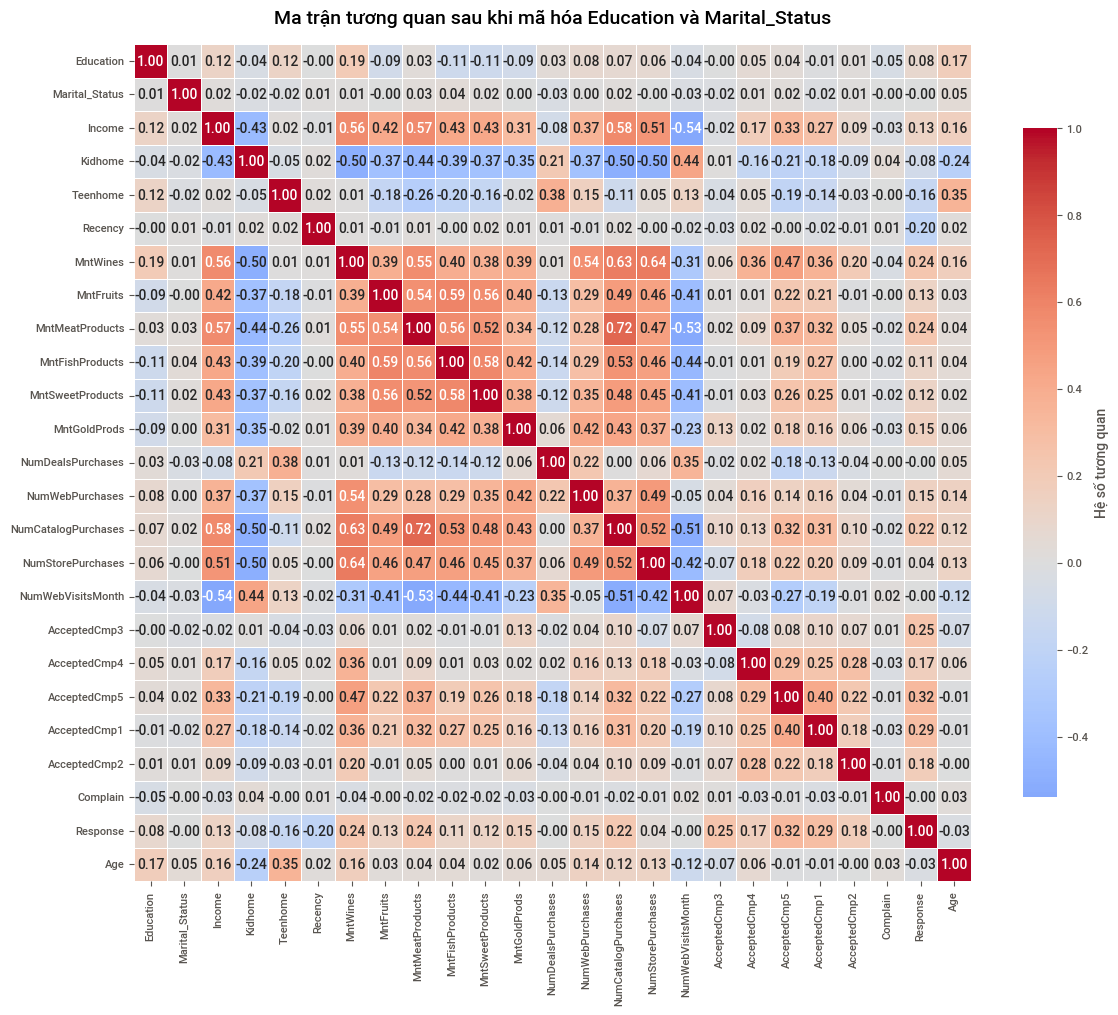


Phân loại mức độ tương quan giữa các biến số:

                  Biến 1               Biến 2  Hệ số tương quan Mức độ quan hệ
169      MntMeatProducts  NumCatalogPurchases          0.721638           Mạnh
137             MntWines    NumStorePurchases          0.638452           Mạnh
136             MntWines  NumCatalogPurchases          0.626678           Mạnh
148            MntFruits      MntFishProducts          0.593156     Trung bình
180      MntFishProducts     MntSweetProducts          0.579798     Trung bình
58                Income  NumCatalogPurchases          0.575259     Trung bình
52                Income      MntMeatProducts          0.565944     Trung bình
164      MntMeatProducts      MntFishProducts          0.562618     Trung bình
50                Income             MntWines          0.561909     Trung bình
149            MntFruits     MntSweetProducts          0.555291     Trung bình
130             MntWines      MntMeatProducts          0.554880     Trung bình
147 

In [23]:
### CORRELATION MATRIX (HEADMAP) - MA TRẬN TƯƠNG QUAN
corr = df_encoded.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="coolwarm", center=0,
    square=True, linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Hệ số tương quan"}
)
plt.title("Ma trận tương quan sau khi mã hóa Education và Marital_Status", fontsize=14, fontweight="bold", pad=15)
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/correlationmatrix.pdf", format="pdf", bbox_inches="tight")
plt.show()

# --- Phân loại mức độ tương quan ---
def classify_corr(value):
    v = abs(value)
    if v < 0.2:
        return "Rất yếu"
    elif v < 0.4:
        return "Yếu"
    elif v < 0.6:
        return "Trung bình"
    elif v < 0.8:
        return "Mạnh"
    else:
        return "Rất mạnh"

corr_pairs = (
    corr.where(~np.tril(np.ones(corr.shape, dtype=bool)))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Biến 1", "Biến 2", "Hệ số tương quan"]
corr_pairs["Mức độ quan hệ"] = corr_pairs["Hệ số tương quan"].apply(classify_corr)
print("\nPhân loại mức độ tương quan giữa các biến số:\n")
print(corr_pairs.sort_values(by="Hệ số tương quan", ascending=False).head(20))


### Demographics



---


MỐI TƯƠNG QUAN GIỮA NHÓM CÁC ĐẶC TRƯNG NHÂN KHẨU HỌC (DEMOGRAPHICS) VÀ TẦN SUẤT PHẢN HỒI CHIẾN DỊCH MARKETING (RESPONSE)



-  **Age** - Tuổi của khách hàng và có ảnh hưởng lớn đến hành vi tiêu dùng.

- **Education** - Trình độ học vấn, dự báo về năng lực tài chính, mức thu nhập và phong cách tiêu dùng.

- **Marital_Status** - Tình trạng hôn nhân , ảnh hưởng đến chi tiêu.

- **Income** - Thu nhập hàng năm, thường có tương quan trực tiếp với mức chi tiêu và phản hồi marketing.

- **Kidhome** - Số trẻ em trong hộ gia đình, ảnh hưởng đến nhu cầu tiêu dùng.

- **Teenhome** - Số thiếu niên trong hộ gia đình.

-  **Response** - Phản hồi của khách hàng trong chiến dịch marketing gần nhất


---



**Mục tiêu**
-  Xác định chân dung nhóm khách hàng phổ biến nhưng tỉ lệ phản hồi chưa cao. Thay đổi chiến dịch phù hợp nhằm giữ chân và nâng cao tương tác với nhóm khách hàng đông đảo này.
-  Nhận diện phân khúc khách hàng tiềm năng ( tỉ lệ phàn hồi cao ) nhưng số lượng còn ít. Từ đó đẩy mạnh chiến dịch nhằm thu hút và khái thác nguồn lợi họ mang lại trong tương lai.


**1. Quy mô khách hàng và tỷ lệ phản hồi (%) theo từng nhóm tuổi (Age-AgeGroup)**

In [25]:
print(df["Age"].describe())

bins = [18, 35, 55, 100]
labels = ["Trẻ(18-34)", "Trung niên(35-54)", "Già(55+)"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Kiểm tra phân bố từng nhóm
print(df["AgeGroup"].value_counts())


count    2058.000000
mean       45.212828
std        11.973898
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64
AgeGroup
Trung niên(35-54)    1142
Già(55+)              524
Trẻ(18-34)            389
Name: count, dtype: int64


/tmp/ipython-input-2628284680.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_response_count = df.groupby("AgeGroup")["Response"].value_counts().unstack().fillna(0)
/tmp/ipython-input-2628284680.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_response_count.index, rotation=0)


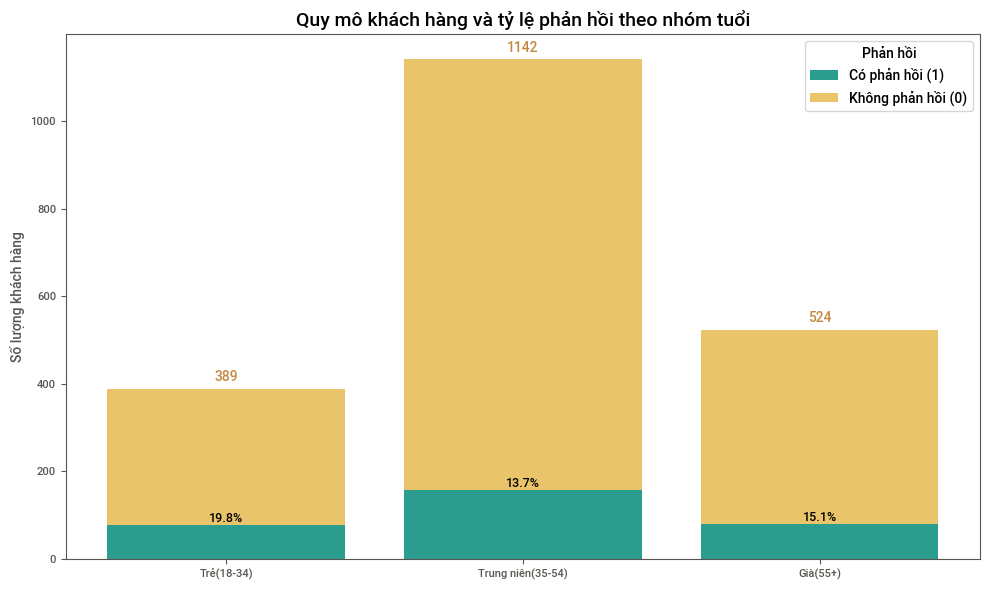

In [26]:
# BIỂU ĐỒ PHÂN PHỐI QUY MÔ KHÁCH HÀNG VÀ TỈ LỆ PHẢN HỒI THEO CÁC NHÓM TUỔI
age_response_count = df.groupby("AgeGroup")["Response"].value_counts().unstack().fillna(0)
age_response_count = age_response_count[[1, 0]]
age_total = age_response_count.sum(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

resp_yes = age_response_count[1]
resp_no = age_response_count[0]
bar_yes = ax.bar(age_response_count.index, resp_yes, color="#2A9D8F", label="Có phản hồi (1)")
bar_no = ax.bar(age_response_count.index, resp_no, bottom=resp_yes, color="#E9C46A", label="Không phản hồi (0)")

ax.set_ylabel("Số lượng khách hàng")
ax.set_xticklabels(age_response_count.index, rotation=0)
ax.set_xlabel("")

# Tổng số lượng
for i, total in enumerate(age_total):
    ax.text(i, total + 10, f"{int(total)}", ha="center", va="bottom", fontsize=10, color="#C28840")

# % phản hồi
for i, (yes, total) in enumerate(zip(resp_yes, age_total)):
    pct = yes / total * 100
    ax.text(i, yes, f"{pct:.1f}%", ha="center", va="bottom", fontsize=9, color="black", fontweight="bold")

# Chú thích & tiêu đề
ax.legend(title="Phản hồi", loc="upper right")
plt.title("Quy mô khách hàng và tỷ lệ phản hồi theo nhóm tuổi", fontsize=14, fontweight="bold")
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/Age_response.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Nhận xét**

-  Nhóm trung niên (35-54) tuổi chiếm tỷ trọng khách hàng lớn nhất, là đối tượng chính của chiến dịch, tuy nhiên tỷ lệ phản hồi chưa đạt kỳ vọng.
-  Ngược lại, nhóm 18–29 tuổi dù quy mô nhỏ nhưng lại có tỷ lệ phản hồi cao nhất, cho thấy đây là phân khúc tiềm năng nếu có chiến lược tiếp cận phù hợp.
-  Nhóm 60+ tuổi có tỷ lệ phản hồi cao hơn cả hai nhóm trung niên (30–44 và 45–59)

**Kết luận**
-  Nhóm tuổi trung niên là đối tượng chính của chiến dịch, nhưng tỉ lệ phản hồi ở nhóm này vẫn chưa được như kỳ vọng.

-  Nhóm khách hàng trẻ (18–34) và trên 55 tuổi có tỷ lệ phản hồi cao hơn đáng kể so với nhóm trung niên  chủ lực, được xếp vào phân khúc khách hàng tiềm năng.



**Câu hỏi đặt ra**
- (1) Trong nhóm khách hàng chủ lực (trung niên) trình độ học vấn và tình trạng hôn nhân nào là phổ biến?  
- (2) Trong nhóm khách hàng tiềm năng (trẻ/ già), TĐHV và TTHN nào có tỉ lệ phản hồi cao nhất?

**2. Quy mô khách hàng và tỷ lệ phản hồi (%) theo trình độ học vấn (Education)**

/tmp/ipython-input-3736064125.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(edu_response_count.index, rotation=30)


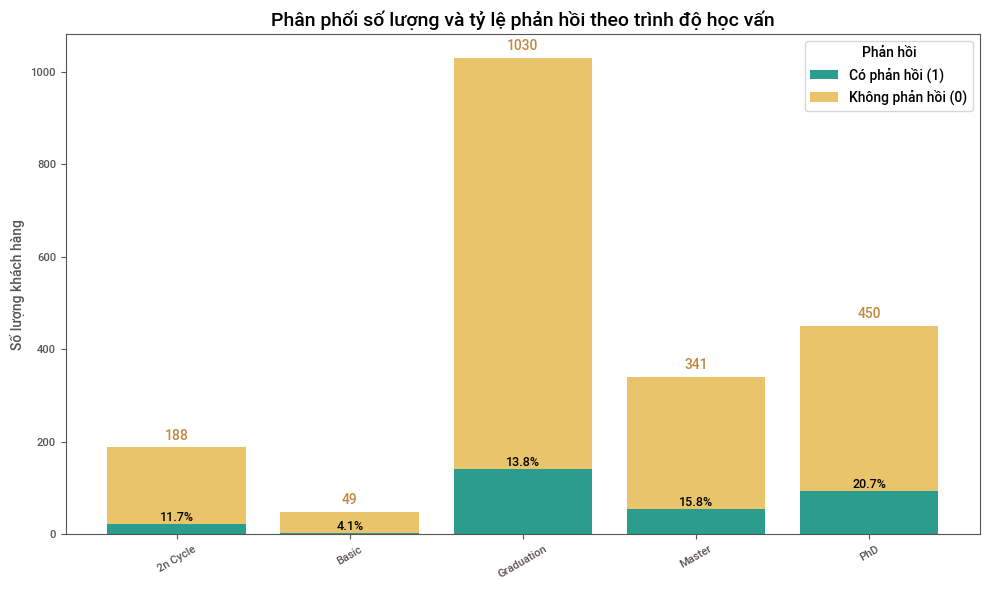

In [27]:
### Biểu đồ phân phối khách hàng và tỷ lệ phản hồi theo trình độ học vấn (Stacked Bar)
edu_response_count = df.groupby("Education")["Response"].value_counts().unstack().fillna(0)
edu_response_count = edu_response_count[[1, 0]]
edu_total = edu_response_count.sum(axis=1)

fig, ax = plt.subplots(figsize=(10,6))

# Vẽ stacked bar
resp_yes = edu_response_count[1]
resp_no = edu_response_count[0]
bar_yes = ax.bar(edu_response_count.index, resp_yes, color="#2A9D8F", label="Có phản hồi (1)")
bar_no = ax.bar(edu_response_count.index, resp_no, bottom=resp_yes, color="#E9C46A", label="Không phản hồi (0)")

# Nhãn trục
ax.set_xlabel("")
ax.set_ylabel("Số lượng khách hàng")
ax.set_xticklabels(edu_response_count.index, rotation=30)

# Thêm tổng số lượng trên đỉnh cột
for i, total in enumerate(edu_total):
    ax.text(i, total + 10, f"{int(total)}", ha="center", va="bottom", fontsize=10, color="#C28840")

# Thêm % phản hồi tại vạch phân chia
for i, (yes, total) in enumerate(zip(resp_yes, edu_total)):
    pct = yes / total * 100
    ax.text(i, yes, f"{pct:.1f}%", ha="center", va="bottom", fontsize=9, color="black", fontweight="bold")

# Legend
ax.legend(title="Phản hồi", loc="upper right")

plt.title("Phân phối số lượng và tỷ lệ phản hồi theo trình độ học vấn", fontsize=14, fontweight="bold")
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/Edu_Response.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Nhận xét:**  
*  Về quy mô khách hàng: khách hàng tập trung chủ yếu ở nhóm Graduation, trong khi các nhóm 2n Cycle và Basic ít hơn đáng kể,  nhóm Master và PhD đứng ở mức trung bình, khá ổn định.
*  Về tỷ lệ phản hồi (%):

    -  Nhóm cao học (PhD và Master) cho thấy tỷ lệ phản hồi cao hơn so với nhóm khách hàng chủ lực Graduation

    -  Graduation là nhóm đông nhất nhưng tỷ lệ phản hồi không cao, tuy nhiên vẫn ở mức ổn định.

    -  Nhóm 2n Cycle có tỷ lệ phản hồi lẫn phân khúc khách hàng ở mức thấp, đặc biệt là Basic.

    

**Kết luận**

-   Khả năng khách hàng phản hồi chiến dịch tỉ lệ thuận với trình độ học vấn, k
hách hàng có trình độ học vấn càng cao thì khả năng phản hồi chiến dịch càng cao.
-   Có thể nói, nhóm khách hàng có học vấn cao (PhD/ Master) là phân khúc khách hàng tiềm năng để phát triển chiến dịch tiếp cận.

**Câu hỏi đặt ra**
-  (3) Nhóm khách hàng tiềm năng (có học vấn cao) có tỉ lệ phản hồi cao ở tình trạng hôn nhân nào?
-  (4) Có phải học vấn càng cao thì thu nhập sẽ càng cao không?

**3. Quy mô khách hàng và tỷ lệ phản hồi (%) theo tình trạng hôn nhân (Marital_Status)**

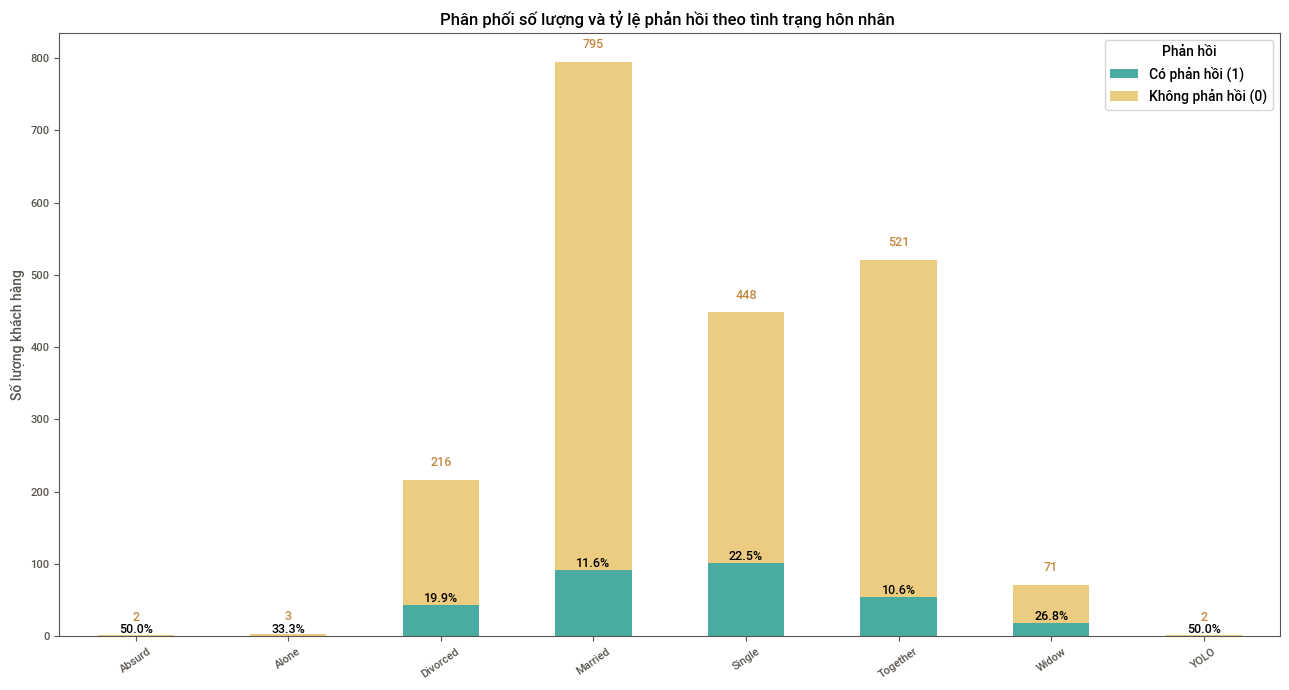

In [28]:
# Biểu đồ phân phối khách hàng và tỷ lệ phản hồi theo tình trạng hôn nhân (Stacked bar)
marital_response_count = df.groupby("Marital_Status")["Response"].value_counts().unstack().fillna(0)
marital_response_count = marital_response_count[[1, 0]]
marital_total = marital_response_count.sum(axis=1)

# Tính tỷ lệ %
marital_response_pct = (marital_response_count.T / marital_total).T * 100

fig, ax = plt.subplots(figsize=(13,7))

# Vẽ stacked bar
bars = marital_response_count.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=["#2A9D8F", "#E9C46A"],
    alpha=0.85
)

# Nhãn số lượng
for i, total in enumerate(marital_total):
    ax.text(i, total + 15, f"{int(total)}", ha="center", va="bottom", fontsize=9, color="#C28840")

# Nhãn %
for i, (resp, total) in enumerate(zip(marital_response_count[1], marital_total)):
    pct = resp / total * 100
    ax.text(i, resp, f"{pct:.1f}%", ha="center", va="bottom", fontsize=9, color="black")

ax.legend(["Có phản hồi (1)", "Không phản hồi (0)"], title="Phản hồi", loc="upper right")
ax.set_xlabel("")
ax.set_ylabel("Số lượng khách hàng")
ax.set_xticklabels(marital_total.index, rotation=35)

plt.title("Phân phối số lượng và tỷ lệ phản hồi theo tình trạng hôn nhân ")
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/Marital_Response.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Nhận xét**
*  Quy mô khách hàng

      -  Các nhóm Married, Together và Single chiếm số lượng khách hàng lớn nhất, trong khi nhóm Widow và Divorced có quy mô nhỏ hơn nhiều, đặc biệt là Alone/YOLO/Absure hầu như không đánh kể, có thể loại bỏ.

*  Tỷ lệ phản hồi (%)

      -  Không tỷ lệ thuận với số lượng khách hàng.
      -  Nhóm Married và Together đông khách hàng hơn nhưng tỷ lệ phản hồi lại tương đối thấp so với Single.
      -  Một số nhóm tuy ít khách hàng (Widow/Divorced) nhưng lại có tỷ lệ phản hồi cao hơn.




**Kết luận**
-  Nhóm khách hàng chủ lực tập trung ở Married và Together  đây là phân khúc đông đảo nhất nên cần tiếp tục duy trì, cải thiện hiệu quả phản hồi thông qua các chiến dịch.

-  Nhóm Single có tỷ lệ phản hồi cao và tiềm năng nhất, có thể ưu tiên các chương trình marketing tập trung vào phân khúc này.

-  Nhóm Widow/Divorced tuy ít khách hàng nhưng có tỷ lệ phản hồi khá tốt, có thể do quy mô nhỏ nên cần thu thập thêm dữ liệu hoặc kiểm chứng trước khi mở rộng chiến dịch.


**4. Quy mô khách hàng và tỷ lệ phản hồi (%) theo trình độ học vấn trong từng nhóm tình trạng hôn nhân**

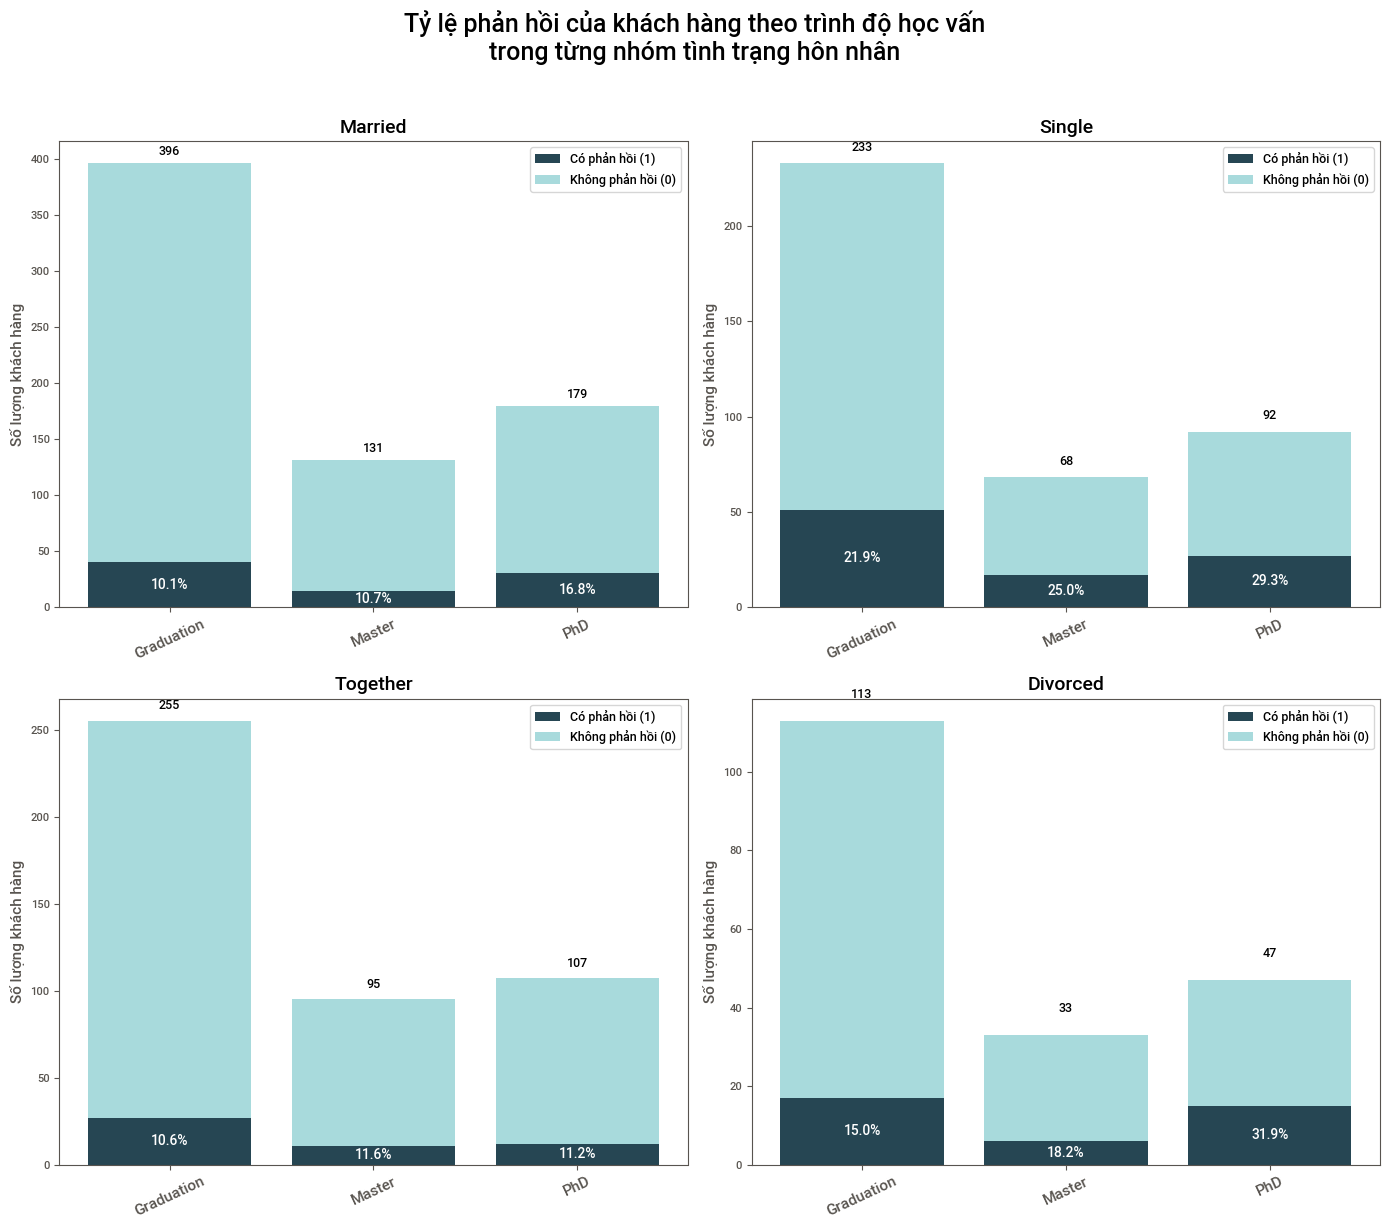

In [29]:
# Biểu đồ phân phối quy mô và tỷ lệ phản hồi của khách hàng theo trình độ học vấn trong từng nhóm tình trạng hôn nhân
edu_marital_counts = (
    df.groupby(["Marital_Status", "Education"])
    .size()
    .reset_index(name="Count")
)

edu_marital_resp = (
    df.groupby(["Marital_Status", "Education"])["Response"]
    .mean()
    .reset_index(name="Response")
)
edu_marital_resp["Response"] *= 100
edu_marital = pd.merge(edu_marital_resp, edu_marital_counts, on=["Marital_Status", "Education"])

valid_edu = ["Graduation", "Master", "PhD"] #"2n Cycle"
valid_marital = ["Married", "Single", "Together", "Divorced"]

edu_marital = edu_marital[
    edu_marital["Education"].isin(valid_edu) &
    edu_marital["Marital_Status"].isin(valid_marital)
]


# Tạo danh sách nhóm tình trạng hôn nhân ---
marital_groups = valid_marital
n = len(marital_groups)

cols = 2
rows = (n + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten()
color_yes = "#264653"
color_no = "#A8DADC"

# Vẽ biểu đồ
for i, m_status in enumerate(marital_groups):
    subset = edu_marital[edu_marital["Marital_Status"] == m_status]
    subset = subset.sort_values("Education", key=lambda x: pd.Categorical(x, valid_edu, ordered=True))

    x = np.arange(len(subset))
    ax = axes[i]

    resp_yes = subset["Count"] * subset["Response"] / 100
    resp_no = subset["Count"] - resp_yes
    bar_yes = ax.bar(x, resp_yes, color=color_yes, label="Có phản hồi (1)")
    bar_no = ax.bar(x, resp_no, bottom=resp_yes, color=color_no, label="Không phản hồi (0)")

    ax.set_title(f"{m_status}", fontsize=14, fontweight="bold")
    ax.set_ylabel("Số lượng khách hàng", fontsize=11)
    ax.set_xticks(x)
    ax.set_xticklabels(subset["Education"], rotation=25, fontsize=11)

    # Tổng số lượng trên đỉnh
    for j, total in enumerate(subset["Count"]):
        ax.text(x[j], total + 5, f"{int(total)}", ha="center", va="bottom", fontsize=9)

    # % phản hồi ngay trên vùng phân chia
    for j, (yes, total) in enumerate(zip(resp_yes, subset["Count"])):
        pct = yes / total * 100
        ax.text(x[j], yes / 2, f"{pct:.1f}%", ha="center", va="center", fontsize=10, color="white", fontweight="bold")

    ax.legend(loc="upper right", fontsize=9)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(
    "Tỷ lệ phản hồi của khách hàng theo trình độ học vấn\ntrong từng nhóm tình trạng hôn nhân",
    fontsize=18,
    fontweight="bold",
    y=1.02,
)
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/Edu_Marital_Resp.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Nhận xét**
- Single là nhóm tình trạng hôn nhân có tỉ lệ phản hồi ở mọi trình độ học vấn phổ biến đều cao và ổn định.
- Tỉ lệ phản hồi khách hàng theo trình độ học vấn ở các nhóm tình trạng hôn nhân có xu hướng tăng theo trình độ học vấn (Graduation -> Master -> PhD).


**Trả lời câu hỏi:**

*(3) Nhóm khách hàng tiềm năng (có học vấn cao) có tỉ lệ phản hồi cao ở tình trạng hôn nhân nào?*

-   Nhóm khách hàng trình độ PhD/Master có tỉ lệ phản hồi cao nhất ở tình trạng hôn nhân Single, tiếp đến là Divorced và khá thấp ở tình trạng Married và Together

**5. Quy mô khách hàng và tỷ lệ phản hồi (%) theo trình độ học vấn & tình trạng hôn nhân trong từng nhóm tuổi**

/tmp/ipython-input-1977940463.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered.groupby(["AgeGroup3", "Edu_Group", "Marital_Status"])


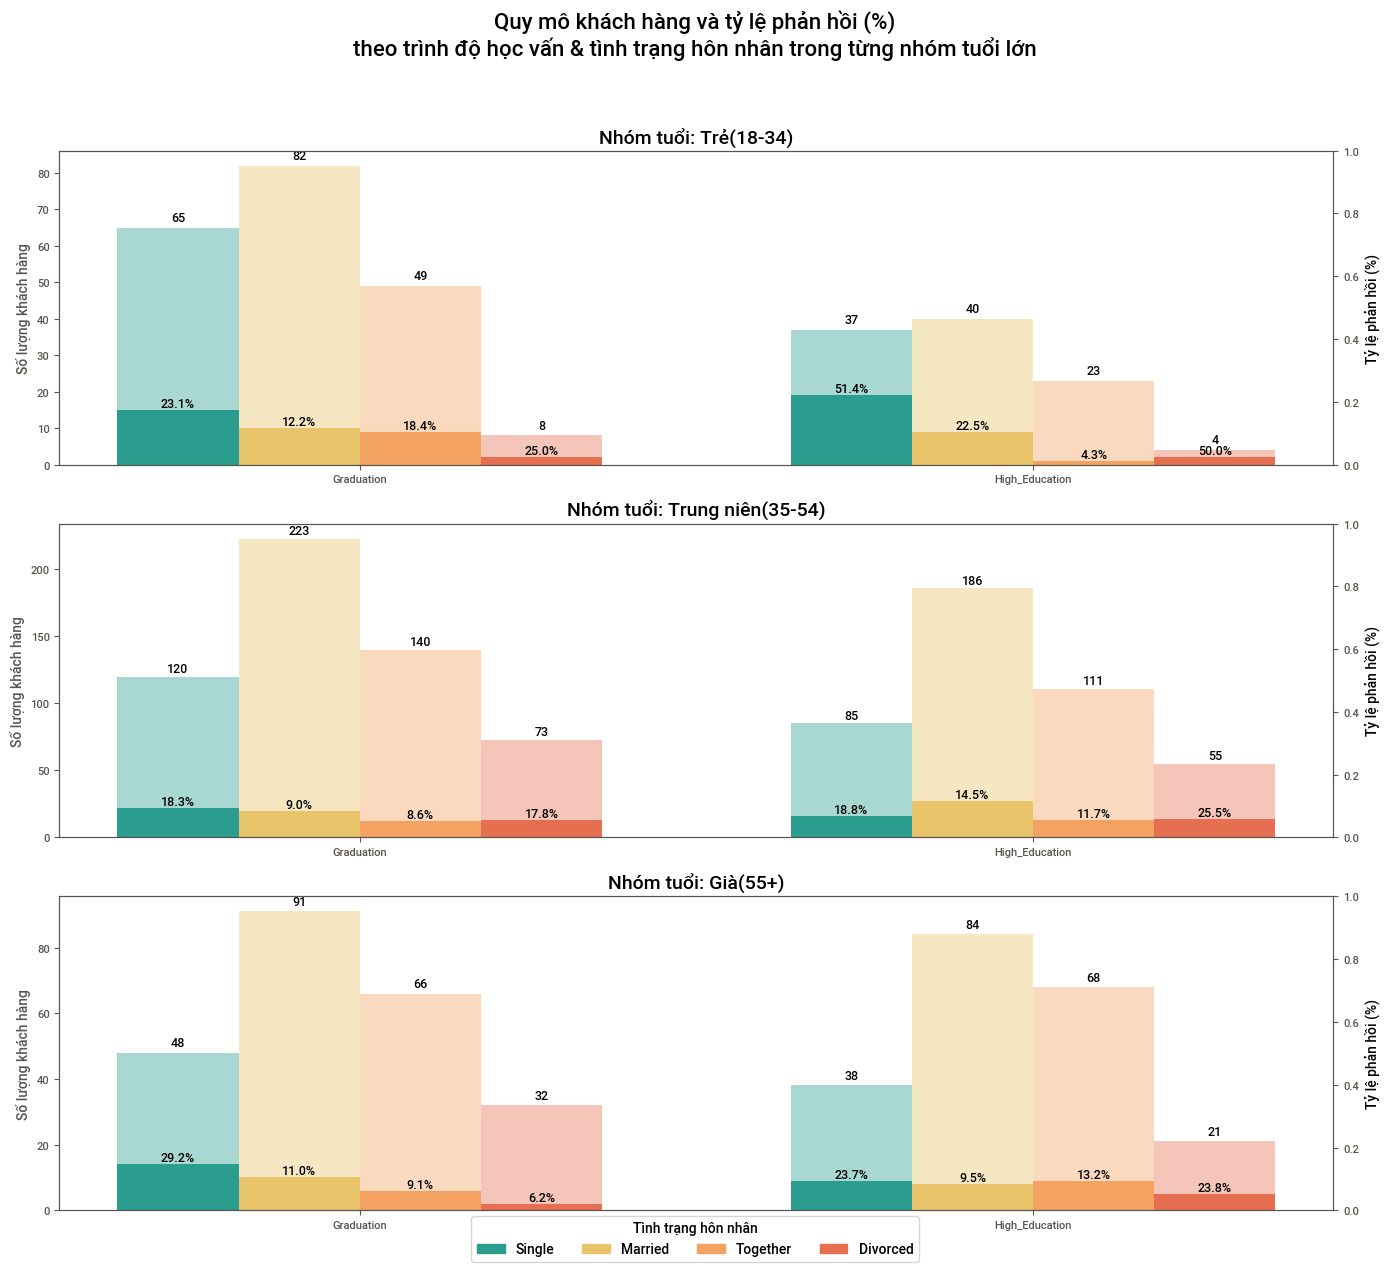

In [30]:
# Biểu đồ Quy mô khách hàng và tỷ lệ phản hồi theo trình độ học vấn & tình trạng hôn nhân trong từng nhóm tuổi
temp = df.copy()
temp["Edu_Group"] = temp["Education"].replace({"Master": "High_Education", "PhD": "High_Education"})

bins = [0, 34, 54, 120]
labels = ["Trẻ(18-34)", "Trung niên(35-54)", "Già(55+)"]
temp["AgeGroup3"] = pd.cut(temp["Age"], bins=bins, labels=labels, right=True)

# Lọc dữ liệu hợp lệ
filtered = temp[
    temp["Edu_Group"].isin(["Graduation", "High_Education"]) &
    temp["AgeGroup3"].isin(labels) &
    temp["Marital_Status"].isin(["Single", "Married", "Together", "Divorced"])
]

# Gom nhóm và tính toán
edu_summary = (
    filtered.groupby(["AgeGroup3", "Edu_Group", "Marital_Status"])
    .agg(Response=("Response", "mean"), Count=("Response", "size"))
    .reset_index()
)
edu_summary["Response"] *= 100  # đổi thành %

edu_groups = ["Graduation", "High_Education"]
marital_statuses = ["Single", "Married", "Together", "Divorced"]
colors = {
    "Single": "#2A9D8F",
    "Married": "#E9C46A",
    "Together": "#F4A261",
    "Divorced": "#E76F51"
}

age_groups = ["Trẻ(18-34)", "Trung niên(35-54)", "Già(55+)"]
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharey=False)
plt.subplots_adjust(hspace=0.4)

width = 0.18
x = np.arange(len(edu_groups))
offsets = np.linspace(-1.5 * width, 1.5 * width, len(marital_statuses))

for i, age_group in enumerate(age_groups):
    ax = axes[i]
    ax2 = ax.twinx()

    sub = edu_summary[edu_summary["AgeGroup3"] == age_group]

    for j, status in enumerate(marital_statuses):
        offset = offsets[j]
        for k, edu in enumerate(edu_groups):
            d = sub[
                (sub["Edu_Group"] == edu) &
                (sub["Marital_Status"] == status)
            ][["Response", "Count"]]

            if len(d) > 0:
                cnt = d["Count"].values[0]
                pct = d["Response"].values[0]
                responded = cnt * pct / 100
                not_responded = cnt - responded

                # Vẽ stacked bar
                ax.bar(k + offset, responded, width=width, color=colors[status], alpha=1)
                ax.bar(k + offset, not_responded, width=width, bottom=responded,
                       color=colors[status], alpha=0.4)

                # Ghi nhãn
                ax.text(k + offset, cnt + 1, f"{int(cnt)}", ha="center", va="bottom", fontsize=9)
                ax.text(k + offset, responded, f"{pct:.1f}%", ha="center", va="bottom",
                        fontsize=9, fontweight="bold")

    ax.set_xticks(x)
    ax.set_xticklabels(["Graduation", "High_Education"])
    ax.set_ylabel("Số lượng khách hàng")
    ax2.set_ylabel("Tỷ lệ phản hồi (%)", color="black")
    ax.set_title(f"Nhóm tuổi: {age_group}", fontsize=14, fontweight="bold")

handles = [plt.Rectangle((0,0),1,1, color=colors[m], label=m) for m in marital_statuses]
fig.legend(handles, marital_statuses, title="Tình trạng hôn nhân",
           loc="upper center", bbox_to_anchor=(0.5, 0.03), ncol=4)

plt.suptitle("Quy mô khách hàng và tỷ lệ phản hồi (%)\n"
             "theo trình độ học vấn & tình trạng hôn nhân trong từng nhóm tuổi lớn",
             fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/Age_Edu_Marital_Resp.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Trả lời câu hỏi**

*(1) Trong nhóm khách hàng chủ lực (trung niên) trình độ học vấn và tình trạng hôn nhân nào là phổ biến?*
-  Nhóm khách hàng trung niên chủ yếu có trình độ đại học (graduation) và đã kết hôn hoặc sống tập thể (từ 2 người trở lên)

*(2) Trong nhóm khách hàng tiềm năng (trẻ), TĐHV và TTHN nào có tỉ lệ phản hồi cao nhất?*
-  Khách hàng trẻ tuổi (18-34), đôc thân (single) có tỉ lệ phản hồi cao nhất ở trình độ học vấn PhD/Master.


**Câu hỏi đặt ra**

(5) Nhóm người lớn tuổi (trên 55) trình độ cao học có tỉ lệ phản hồi khá ổn định dù ở tình trạng hôn nhân nào, vậy mức thu nhập của họ như thế nào?

**6. Phân phối phản hồi theo thu nhập (Income)**

In [31]:
print(df["Income"].describe())

count      2058.000000
mean      52356.502445
std       25377.605248
min        1730.000000
25%       35701.750000
50%       52054.000000
75%       68242.500000
max      666666.000000
Name: Income, dtype: float64


/tmp/ipython-input-855235906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=high_income_df, x="Response", y="Income", palette=["#E9C46A", "#2A9D8F"])


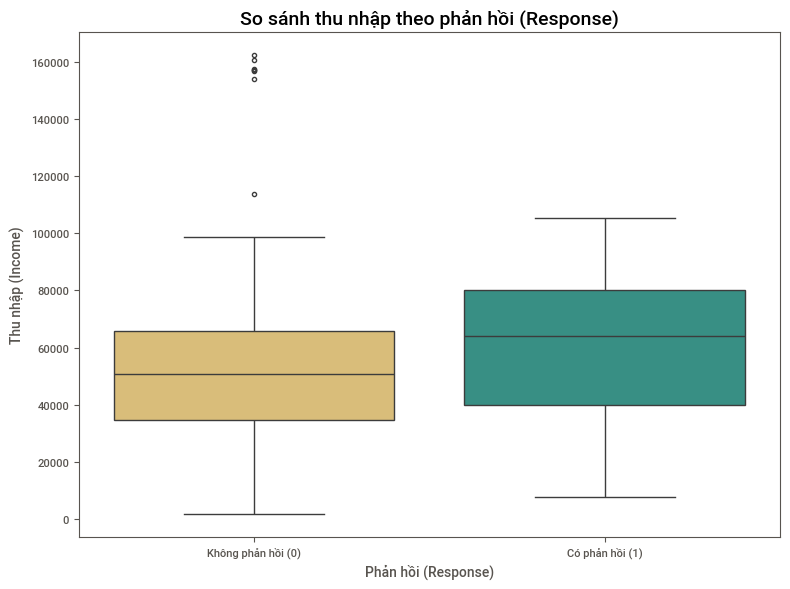

           count          mean           std     min       25%      50%  \
Response                                                                  
0         1744.0  50609.141503  20835.625273  1730.0  34686.25  50640.0   
1          313.0  60129.946490  23098.422717  7500.0  39763.00  63998.0   

               75%       max  
Response                      
0         65784.75  162397.0  
1         80134.00  105471.0  


In [32]:
# Biểu đồ phân phối phản hồi theo thu nhập
high_income_df = df[df["Income"] < 200000]

plt.figure(figsize=(8,6))
sns.boxplot(data=high_income_df, x="Response", y="Income", palette=["#E9C46A", "#2A9D8F"])
plt.title("So sánh thu nhập theo phản hồi (Response)", fontsize=14, fontweight="bold")
plt.xlabel("Phản hồi (Response)")
plt.ylabel("Thu nhập (Income)")
plt.xticks([0, 1], ["Không phản hồi (0)", "Có phản hồi (1)"])
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/Income_Resp.pdf", format="pdf", bbox_inches="tight")
plt.show()

# --- Tính toán thống kê cơ bản ---
stats = high_income_df.groupby("Response")["Income"].describe()
print(stats)



**Nhận xét **

 - Trung bình thu nhập của nhóm khách hàng có phản hồi cao hơn so với nhóm khách hàng không phản hồi (60130 > 50609)

**Câu hỏi đặt ra**
-  (6) Nhìn chung, mức thu nhập phổ biến của nhóm khách hàng chủ lực như thế nào?
-  (7) Liệu thu nhập của nhóm khách hàng tiềm năng (trẻ tuổi - học cao - độc thân) có cao hay không?

/tmp/ipython-input-1646339824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


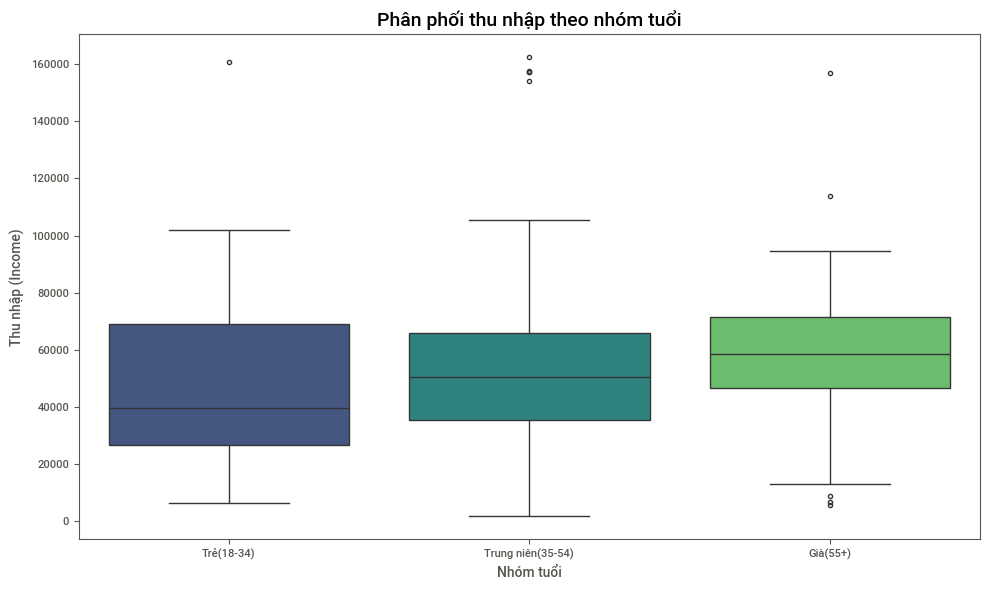

                    count          mean           std     min      25%  \
AgeGroup                                                                 
Trẻ(18-34)          389.0  46661.242305  24859.524890  6560.0  26576.0   
Trung niên(35-54)  1141.0  51108.691293  20911.309394  1730.0  35544.0   
Già(55+)            524.0  58084.774830  18356.233824  5648.0  46610.0   

                       50%       75%       max  
AgeGroup                                        
Trẻ(18-34)         39665.0  69109.00  160803.0  
Trung niên(35-54)  50437.0  65808.00  162397.0  
Già(55+)           58631.5  71444.25  156924.0  


In [33]:
# Biểu đồ phân phối thu nhập theo nhóm tuổi
high_income_df = df[df["Income"] < 200000].copy()

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=high_income_df,
    x="AgeGroup",
    y="Income",
    palette="viridis"
)
plt.title("Phân phối thu nhập theo nhóm tuổi", fontsize=14, fontweight="bold")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Thu nhập (Income)")
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/Age_Income.pdf", format="pdf", bbox_inches="tight")
plt.show()

# --- Tính toán thống kê cơ bản ---
stats = high_income_df.groupby("AgeGroup", observed=True)["Income"].describe()
print(stats)
age_groups = stats.index.tolist()


**Nhận xét**
-  Mức thu nhập trung bình tăng theo các nhóm tuổi (trẻ -> trung niên -> già), phản ánh quá trình tích lũy kinh nghiệm, vị trí công việc cao hơn khi độ tuổi tăng.
-  Thu nhập của nhóm trung niên và người già có khá nhiều giá trị ngoại lai, sự phân hóa thu nhập cũng rõ ràng hơn bởi yếu tố như trình độ học vấn, ...
-  Mức thu nhập của nhóm khách hàng trên 55 tuổi cao hơn mức trung bình tổng thể (58632>52357) và các nhóm tuổi còn lại

**Trả lời câu hỏi**

*(6) Nhìn chung, mức thu nhập phổ biến của nhóm khách hàng chủ lực như thế nào?*

- Mức thu nhập trung bình của nhóm khách hàng trung niên ở mức thấp hơn so với mức thu nhập trung bình tổng thể (51108 < 52357), nhưng vẫn cao hơn so với nhóm trẻ tuổi (46661)

/tmp/ipython-input-556276203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


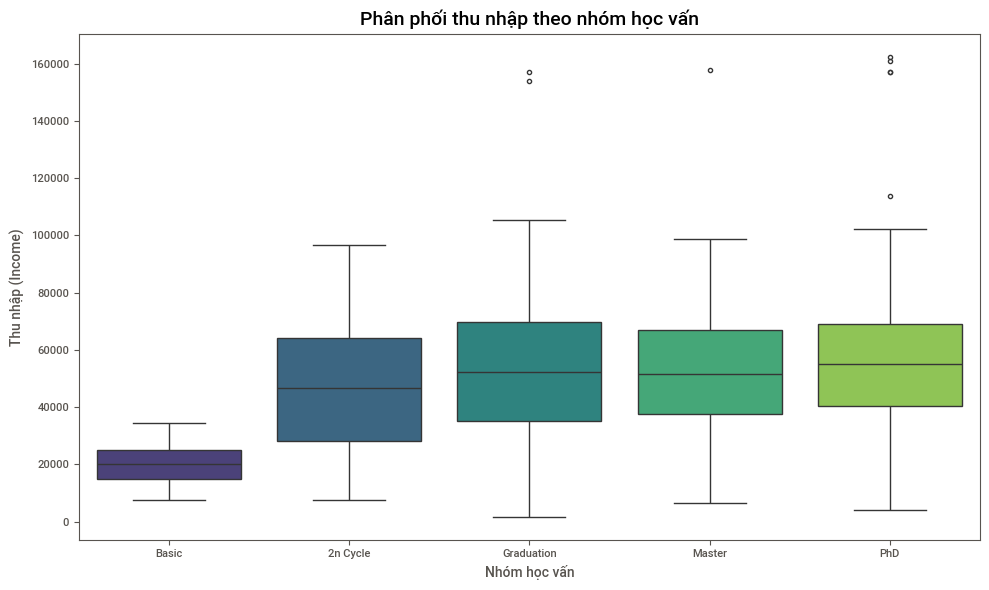

             count          mean           std     min       25%  \
Education                                                          
2n Cycle     188.0  47669.477415  22021.136805  7500.0  28276.00   
Basic         49.0  19913.346939   6365.638062  7500.0  15056.00   
Graduation  1029.0  52335.266049  21220.552913  1730.0  35246.00   
Master       341.0  53163.062337  20096.929345  6560.0  37787.00   
PhD          450.0  55919.571682  20725.652497  4023.0  40370.75   

                     50%       75%       max  
Education                                     
2n Cycle    46861.000000  64339.75   96547.0  
Basic       20194.000000  24882.00   34445.0  
Graduation  52247.251354  69901.00  157146.0  
Master      51529.000000  66835.00  157733.0  
PhD         54919.500000  68998.50  162397.0  


In [34]:
# Biểu đồ phân phối thu nhập theo học vấn
valid_edu = ["Basic","2n Cycle", "Graduation", "Master", "PhD"]

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df[(df["Education"].isin(valid_edu)) & (df["Income"] < 200000)],
    x="Education",
    y="Income",
    order=valid_edu,
    palette="viridis"
)

plt.title("Phân phối thu nhập theo nhóm học vấn", fontsize=14, fontweight="bold")
plt.xlabel("Nhóm học vấn")
plt.ylabel("Thu nhập (Income)")
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/Income_Edu.pdf", format="pdf", bbox_inches="tight")
plt.show()


# --- Tính toán thống kê cơ bản ---
stats = high_income_df.groupby("Education")["Income"].describe()
print(stats)



**Trả lời câu hỏi**

*(4) Có phải học vấn càng cao thì thu nhập sẽ càng cao không?*

- Điều này phân bố rõ rệt ở mức trình độ từ Basic đến 2n Cycle, còn từ 2n Cycle đến Graduation/Hight_Education không có sự chênh lệch quá lớn, khả năng phụ thuộc vào kỹ thuật chuyên môn và nhiều yếu tố khác.

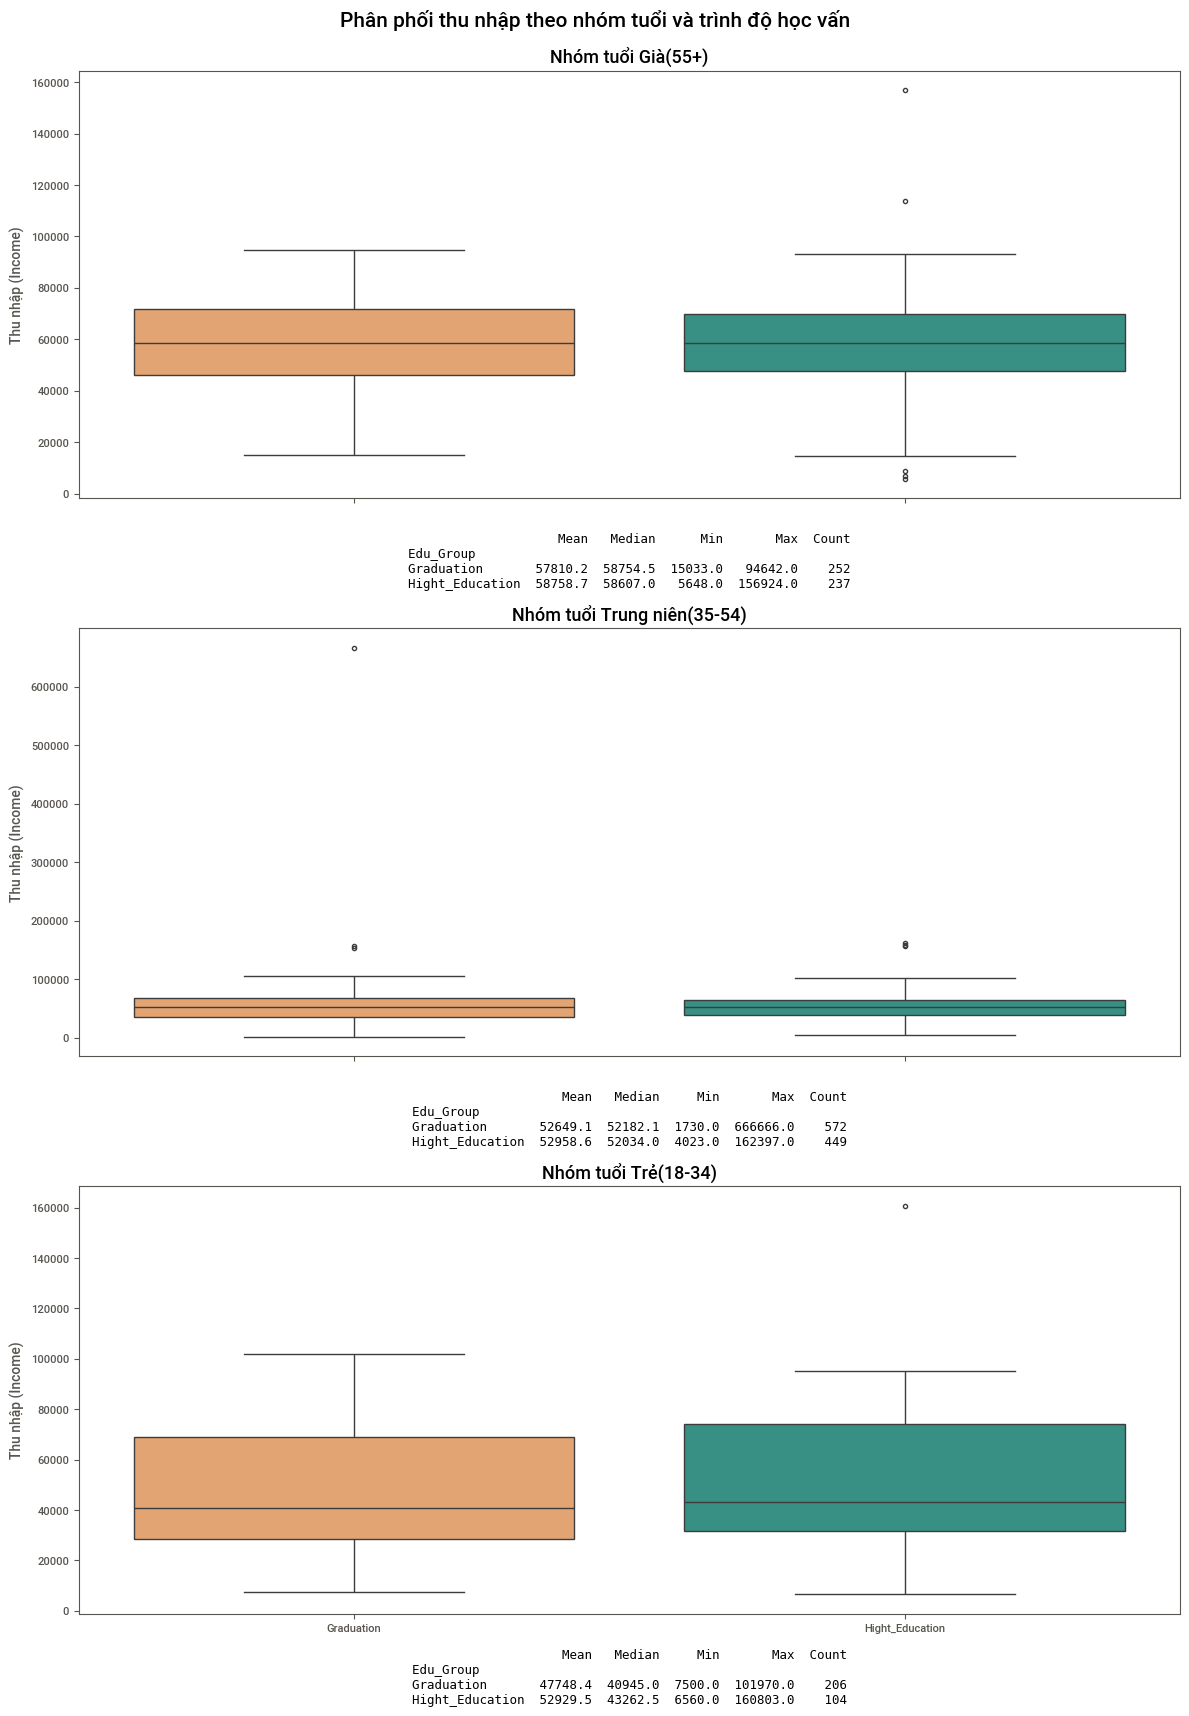

In [35]:
# Biểu đồ phân phối thu nhập theo nhóm tuổi và trình độ học vấn
df["Edu_Group"] = df["Education"].replace({
    "Graduation": "Graduation",
    "PhD": "Hight_Education",
    "Master": "Hight_Education"
})

valid_groups = ["Graduation", "Hight_Education"]
filtered_df = df[
    df["Edu_Group"].isin(valid_groups) &
    df["AgeGroup"].notna()
]

age_groups = sorted(filtered_df["AgeGroup"].dropna().unique())
fig, axes = plt.subplots(len(age_groups), 1, figsize=(12, 6 * len(age_groups)), sharex=True)

if len(age_groups) == 1:
    axes = [axes]

# --- Vẽ từng boxplot theo nhóm tuổi ---
for i, group in enumerate(age_groups):
    subset = filtered_df[filtered_df["AgeGroup"] == group]

    sns.boxplot(
        data=subset,
        x="Edu_Group",
        y="Income",
        hue="Edu_Group",
        palette={"Graduation": "#F4A261", "Hight_Education": "#2A9D8F"},
        legend=False,
        ax=axes[i]
    )

    axes[i].set_title(f"Nhóm tuổi {group}", fontsize=13, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Thu nhập (Income)")

    # --- Tính thống kê cơ bản ---
    stats = subset.groupby("Edu_Group")["Income"].agg(
        Mean="mean", Median="median", Min="min", Max="max", Count="count"
    ).round(1)

    # Tạo bảng thống kê dạng text
    table_text = stats.to_string()

    axes[i].text(
        0.5, -0.08, table_text,
        transform=axes[i].transAxes,
        fontsize=9, family='monospace',
        ha='center', va='top'
    )

plt.suptitle(
    "Phân phối thu nhập theo nhóm tuổi và trình độ học vấn\n",
    fontsize=15, fontweight="bold", y=0.95
)

plt.tight_layout(rect=[0, 0, 1, 0.97])
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/Edu_Age_Income.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [39]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AgeGroup,Edu_Group
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,57,Già(55+),Graduation
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,60,Già(55+),Graduation
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,49,Trung niên(35-54),Graduation
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,30,Trẻ(18-34),Graduation
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,33,Trẻ(18-34),Hight_Education


**Trả lời câu hỏi**

(5) Nhóm người lớn tuổi (trên 55) trình độ cao học có tỉ lệ phản hồi khá ổn định dù ở tình trạng hôn nhân nào, vậy mức thu nhập của họ như thế nào?

- Mức thu nhập của nhóm người trên 55 tuổi ở trình độ PhD/Master cao hơn mức thu nhập trung bình chung của nhóm tuổi này (58758 > 58672) và là nhóm có mức thu nhập cao nhất so với các phân khúc khách hàng khác.

*Đây là phân khúc khách hàng tiềm năng ngoài dự kiến, tỉ lệ phản hồi ở mức khá cao và ổn định song mức thu nhập lại ở mức đáng kỳ vọng.*

In [40]:


df["Edu_Group"] = df["Education"].replace({
    "Graduation": "Graduation",
    "Master": "High_Education",
    "PhD": "High_Education"
})

# --- Lọc dữ liệu theo điều kiện ---
filtered_df = df[
    (df["AgeGroup"] == "Trẻ(18-34)") &
    (df["Marital_Status"] == "Single") &
    (df["Edu_Group"] == "High_Education") &
    (df["Income"] < 200000)
].copy()


# --- In thống kê cơ bản ---
if not filtered_df.empty:
    stats = filtered_df["Income"].describe()
    print("\nThu nhập của nhóm khách hàng được cho là tiềm năng (18 đến 34 tuổi, độc thân, có trình độ học vấn cao (PhD/Master))")
    print(stats)
else:
    print("⚠️ Không có dữ liệu phù hợp điều kiện.")



Thu nhập của nhóm khách hàng được cho là tiềm năng (18 đến 34 tuổi, độc thân, có trình độ học vấn cao (PhD/Master))
count       37.000000
mean     53507.655442
std      27297.637890
min       6560.000000
25%      31788.000000
50%      42000.000000
75%      76412.000000
max      95169.000000
Name: Income, dtype: float64


**Trả lời câu hỏi**

*(7) Liệu thu nhập của nhóm khách hàng tiềm năng (trẻ tuổi - học cao - độc thân) có cao hay không?*

- Thu nhập trung bình của khách hàng ở phân khúc này không quá cao nhưng cao hơn hẳn so với mức trung bình thu nhập của nhóm trẻ tuổi (53508 > 46661), cũng cao hơn so với thu nhập trung bình tổng thể (52357).

*Cùng với tỉ lệ phản hồi cao vượt trội song quy mô còn khá giới hạn (37/2058), cần phát triển các chiến dịch phù hợp để mở rộng quy mô và khai thác nguồn lợi từ nhóm khách hàng này trong tương lai.*

**7. Quy mô khách hàng và tỷ lệ phản hồi theo Kidhome và TeenHome**

In [41]:
# tạo cột mới TotalChildren
df["TotalChildren"] = df["Kidhome"] + df["Teenhome"]
df.head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AgeGroup,Edu_Group,TotalChildren
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,1,57,Già(55+),Graduation,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,60,Già(55+),Graduation,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,49,Trung niên(35-54),Graduation,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,30,Trẻ(18-34),Graduation,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,33,Trẻ(18-34),High_Education,1
5,Master,Together,62513.0,0,1,16,520,42,98,0,...,0,0,0,0,0,0,47,Trung niên(35-54),High_Education,1
6,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,...,0,0,0,0,0,0,43,Trung niên(35-54),Graduation,1
7,PhD,Married,33454.0,1,0,32,76,10,56,3,...,0,0,0,0,0,0,29,Trẻ(18-34),High_Education,1
8,PhD,Together,30351.0,1,0,19,14,0,24,3,...,0,0,0,0,0,1,40,Trung niên(35-54),High_Education,1
9,PhD,Together,5648.0,1,1,68,28,0,6,1,...,0,0,0,0,0,0,64,Già(55+),High_Education,2


**Câu hỏi đặt ra**

(8) Đối với nhóm khách hàng có đông con nhỏ có kích thích tỉ lệ phản hồi chiến dịch marketing tăng lên không?

(9) Nhóm khách hàng có con ở độ tuổi/ trình độ nào có tỉ lệ phản hồi cao nhất?

(10) Trong nhóm khách hàng cao cấp (thu nhập cao, học vấn cao), quy mô gia đình (số con) có ảnh hưởng như thế nào đến tỷ lệ phản hồi chiến dịch marketing?



-  SO SÁNH QUY MÔ VÀ TỈ LỆ PHẢN HỒI CỦA NHÓM KHÁCH HÀNG CÓ CON VÀ KHÔNG CÓ CON

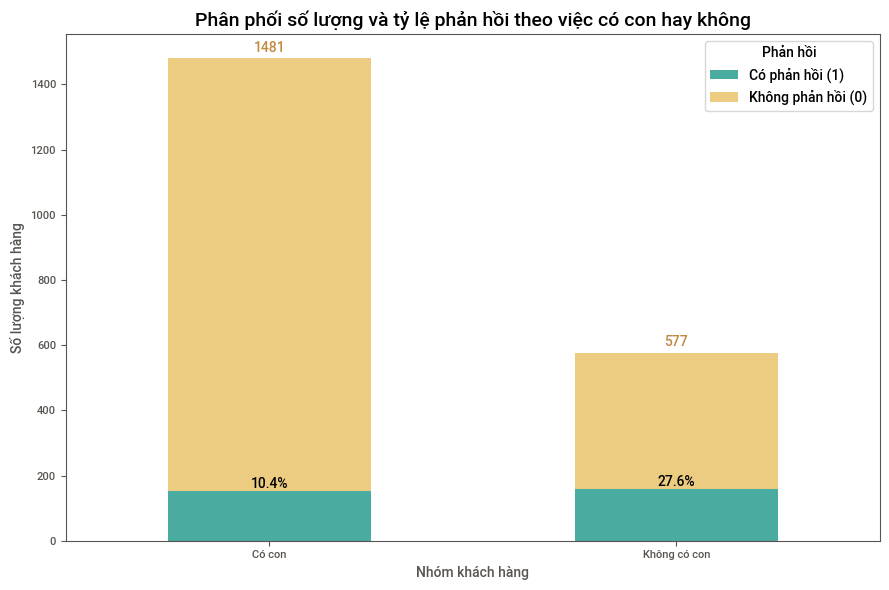

In [42]:
# Biểu đồ Phân phối số lượng và tỷ lệ phản hồi của khách hàng theo nhóm có con và không có con
temp = df.copy()
temp["HasChildren"] = temp["TotalChildren"].apply(lambda x: "Không có con" if x == 0 else "Có con")
child_response_count = temp.groupby("HasChildren")["Response"].value_counts().unstack().fillna(0)
child_response_count = child_response_count[[1, 0]]
child_total = child_response_count.sum(axis=1)
child_response_pct = (child_response_count.T / child_total).T * 100

# --- Vẽ biểu đồ ---
fig, ax = plt.subplots(figsize=(9,6))

child_response_count.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=["#2A9D8F", "#E9C46A"],
    alpha=0.85
)

for i, total in enumerate(child_total):
    ax.text(i, total + 10, f"{int(total)}", ha="center", va="bottom", fontsize=10, color="#C28840")

for i, (resp, total) in enumerate(zip(child_response_count[1], child_total)):
    pct = resp / total * 100 if total > 0 else 0
    ax.text(i, resp, f"{pct:.1f}%", ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

ax.legend(["Có phản hồi (1)", "Không phản hồi (0)"], title="Phản hồi", loc="upper right")
ax.set_xlabel("Nhóm khách hàng")
ax.set_ylabel("Số lượng khách hàng")
ax.set_xticklabels(["Có con", "Không có con"], rotation=0)

plt.title("Phân phối số lượng và tỷ lệ phản hồi theo việc có con hay không", fontsize=14, fontweight="bold")
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/totalChild_Resp.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Nhận xét**
-  Về quy mô khách hàng:  Nhóm khách hàng có con chiếm gần 72% tổng số lượng tham gia khảo sát.
- Về tỉ lệ phản hồi (%) : Nhóm khách hàng không có con có tỉ lệ phản hồi cao hơn hẳn so với nhóm có con (27.6% > 10.4%), song quy mô chưa đến 30% trên tổng thể.

-  QUY MÔ VÀ TỈ LỆ PHẢN HỒI CỦA CÁC NHÓM TOTALCHILDREN

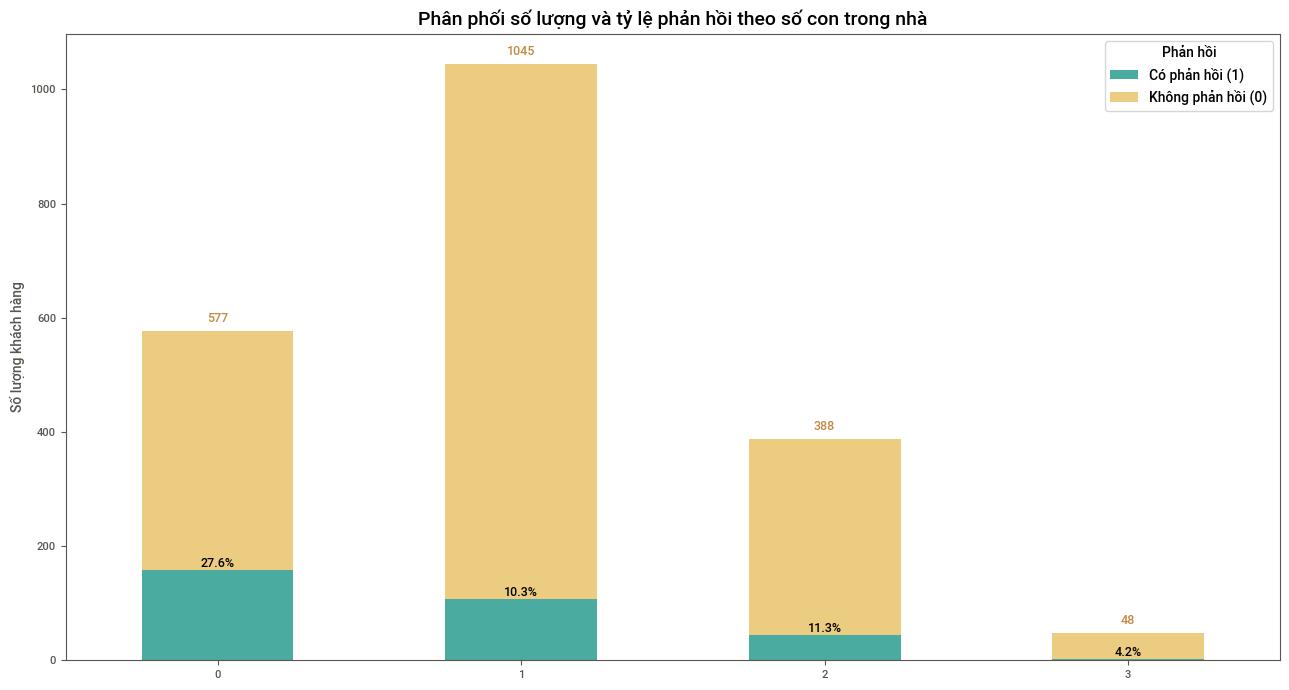

In [43]:
# Biểu đồ Phân phối số lượng và tỷ lệ phản hồi theo số con trong nhà
child_response_count = df.groupby("TotalChildren")["Response"].value_counts().unstack().fillna(0)
child_response_count = child_response_count[[1, 0]]
child_total = child_response_count.sum(axis=1)
child_response_pct = (child_response_count.T / child_total).T * 100

fig, ax = plt.subplots(figsize=(13,7))
child_response_count.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=["#2A9D8F", "#E9C46A"],
    alpha=0.85
)

for i, total in enumerate(child_total):
    ax.text(i, total + 10, f"{int(total)}", ha="center", va="bottom", fontsize=9, color="#C28840")

for i, (resp, total) in enumerate(zip(child_response_count[1], child_total)):
    pct = resp / total * 100 if total > 0 else 0
    ax.text(i, resp, f"{pct:.1f}%", ha="center", va="bottom", fontsize=9, color="black", fontweight="bold")

ax.legend(["Có phản hồi (1)", "Không phản hồi (0)"], title="Phản hồi", loc="upper right")
ax.set_xlabel("")
ax.set_ylabel("Số lượng khách hàng")
ax.set_xticklabels(child_total.index, rotation=0)

plt.title("Phân phối số lượng và tỷ lệ phản hồi theo số con trong nhà", fontsize=14, fontweight="bold")
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/totalChild_Resp(2).pdf", format="pdf", bbox_inches="tight")
plt.show()


**Trả lời câu hỏi**

*(8) Đối với nhóm khách hàng có đông con nhỏ có kích thích tỉ lệ phản hồi chiến dịch marketing tăng lên không?*

-  Nhóm khách hàng có đông con không những không làm tăng tỉ lệ phản hồi mà càng đông con thì khả năng phản hồi càng giảm. (Dù ở mức 2 con có tăng nhẹ so với mức 1 nhưng vẫn không đáng kể)

/tmp/ipython-input-4213890069.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  has_child_df.groupby(["AgeGroup", "Education"])["Response"]


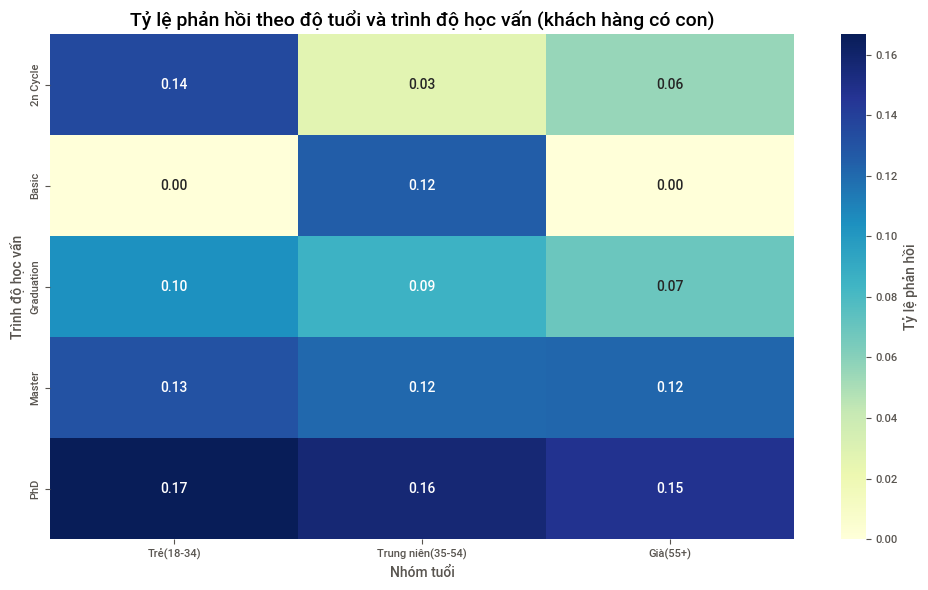

In [44]:
# Ma trận tỷ lệ phản hồi của nhóm khách hàng có con theo độ tuổi và trình độ học vấn

has_child_df = df[df["TotalChildren"] > 0].copy()
response_rate = (
    has_child_df.groupby(["AgeGroup", "Education"])["Response"]
    .mean()
    .reset_index()
)

# --- Vẽ biểu đồ heatmap ---
pivot_table = response_rate.pivot(index="Education", columns="AgeGroup", values="Response")

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True, fmt=".2f", cmap="YlGnBu",
    cbar_kws={'label': 'Tỷ lệ phản hồi'}
)
plt.title("Tỷ lệ phản hồi theo độ tuổi và trình độ học vấn (khách hàng có con)", fontsize=14, fontweight="bold")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Trình độ học vấn")
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/headmap1.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Trả lời câu hỏi**

*(9) Nhóm khách hàng có con ở độ tuổi/ trình độ nào có tỉ lệ phản hồi cao nhất?*

Có thể thấy, nhóm khách hàng có con - trình độ cao học có tỉ lệ phản hồi cao và ổn định ở mọi độ tuổi, đặc biệt là nhóm PhD.

*Tập trung marketing có chọn lọc vào nhóm khách hàng có con, trình độ cao học, với thông điệp gắn với giá trị gia đình, chất lượng và phát triển con cái.*

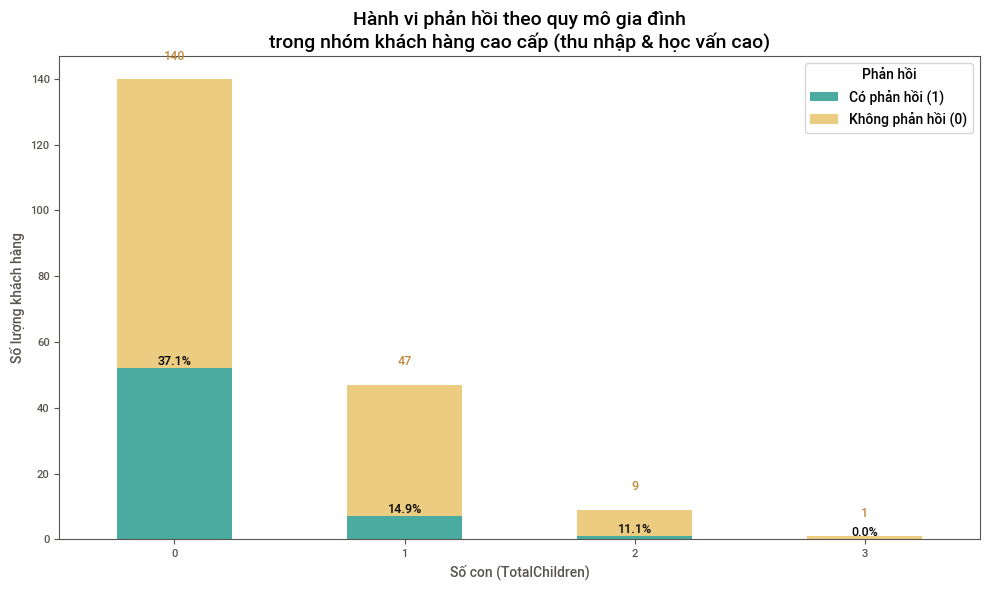

In [45]:
### phân tích hành vi nhóm khách hàng cao cấp
import matplotlib.pyplot as plt
import pandas as pd

threshold = df["Income"].quantile(0.75)
high_income_high_edu = df[
    (df["Income"] >= threshold) &
    (df["Edu_Group"] == "High_Education")
]

child_summary = (
    high_income_high_edu
    .groupby("TotalChildren")["Response"]
    .value_counts()
    .unstack()
    .fillna(0)
    .astype(int)
)

# Đảm bảo cột 1 (có phản hồi) trước
child_summary = child_summary[[1, 0]] if 1 in child_summary.columns else child_summary
child_summary["Total"] = child_summary.sum(axis=1)
child_summary["Response_%"] = child_summary[1] / child_summary["Total"] * 100

# --- Vẽ stacked bar ---
fig, ax = plt.subplots(figsize=(10, 6))

bars = child_summary[[1, 0]].plot(
    kind="bar",
    stacked=True,
    color=["#2A9D8F", "#E9C46A"],
    ax=ax,
    alpha=0.85
)

# --- Ghi nhãn ---
for i, total in enumerate(child_summary["Total"]):
    ax.text(i, total + 5, f"{int(total)}", ha="center", va="bottom", fontsize=9, color="#C28840")

for i, (resp, total, pct) in enumerate(zip(child_summary[1], child_summary["Total"], child_summary["Response_%"])):
    ax.text(i, resp, f"{pct:.1f}%", ha="center", va="bottom", fontsize=9, color="black", fontweight="bold")

# --- Cài đặt trục & tiêu đề ---
ax.legend(["Có phản hồi (1)", "Không phản hồi (0)"], title="Phản hồi", loc="upper right")
ax.set_xlabel("Số con (TotalChildren)")
ax.set_ylabel("Số lượng khách hàng")
ax.set_xticklabels(child_summary.index, rotation=0)
plt.title("Hành vi phản hồi theo quy mô gia đình\ntrong nhóm khách hàng cao cấp (thu nhập & học vấn cao)", fontsize=14, fontweight="bold")
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/PhanTichDuLieu/EDA_marketingCampaign/Graph_Image/vip_cust.pdf", format="pdf", bbox_inches="tight")
plt.show()



**Nhận xét**

-  Nhóm khách hàng không có con hoặc ít con (0–1) có xu hướng phản hồi cao hơn, có thể do họ có thời gian và thu nhập tự do hơn.

-  Ngược lại, nhóm nhiều con thường có tỷ lệ phản hồi thấp hơn, có thể do ưu tiên chi tiêu và thời gian bị phân tán.

*Hành vi này giúp định hướng cá nhân hóa nội dung marketing, nhóm ít con có thể quan tâm đến trải nghiệm cá nhân, còn nhóm nhiều con quan tâm đến ưu đãi gia đình.*

**Trả lời câu hỏi**

*(10) Trong nhóm khách hàng cao cấp (thu nhập cao, học vấn cao), quy mô gia đình (số con) có ảnh hưởng như thế nào đến tỷ lệ phản hồi chiến dịch marketing?*

Nhóm này vừa chiếm tỷ trọng lớn, vừa có tỷ lệ phản hồi cao nhất, cho thấy họ quan tâm nhiều hơn đến các chiến dịch marketing cá nhân hóa.
Khi số con tăng, tỷ lệ phản hồi giảm dần.


---



**KẾT LUẬN CHUNG **

1.  Nhóm khách hàng chủ lực (Chân dung nhóm khách hàng phổ biến)

    * Độ tuổi trung niên (35–54)

    * Trình độ: Graduation

    * Tình trạng hôn nhân: Married

    * Thu nhập: ổn định, ở mức trung bình khá

    * Gia đình: có con nhỏ hoặc tuổi teen

*→ Đây là nhóm chiếm tỷ trọng lớn nhưng tỷ lệ phản hồi chưa khả quan, có xu hướng ổn định và ít thay đổi hành vi.*

2.  Nhóm khách hàng triển vọng (Phân khúc nhóm khách hàng tiềm năng)

*  Nhóm 1:

    - Độ tuổi: 18–34 (trẻ)

    - Trình độ học vấn: Cao học

    - Tình trạng hôn nhân: Single

    - Thu nhập: ở mức khá

    - Gia đình: không có con

*→ Tỷ lệ phản hồi tốt, thể hiện sự quan tâm và tiềm năng phát triển dài hạn.*

*  Nhóm 2:

    - Độ tuổi: trên 55 tuổi

    - Trình độ học vấn: Cao học

    - Tình trạng hôn nhân: đa dạng

    - Thu nhập: cao hơn hẳn mức trung bình tổng thể

    - Gia đình: ít hoặc không có con

*→ Phản hồi tích cực, cho thấy nhóm có điều kiện tài chính và quan tâm cao đến các chiến dịch marketing.*


---


**Tổng kết xu hướng**

1. Nhóm chủ lực đông nhưng ít phản hồi, trong khi nhóm thiểu số phản hồi cao hơn.

2. Trình độ học vấn cao gắn liền với tỷ lệ phản hồi cao.

3. Thu nhập tăng theo tuổi, nhưng không có mối liên hệ mạnh với trình độ học vấn.